In [33]:
import time
import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm
import datetime
from datetime import timedelta
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [60]:
# import plotly as py
# from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
# import plotly.graph_objs as go
# init_notebook_mode(connected=True)
# import plotly.offline as pyoffline
# import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [45]:
df = pd.read_csv('gam_covid_trend2.csv')
df.tail(10)

,ds,y
128,2020-07-24,17
129,2020-07-25,22
130,2020-07-26,25
131,2020-07-27,18
132,2020-07-28,28
133,2020-07-29,13
134,2020-07-30,23
135,2020-07-31,15
136,2020-08-01,24
137,2020-08-02,35


In [68]:
df['cap'] = 100

In [37]:
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds', ascending=True)
print(df.shape)
df.tail(39)

(138, 2)


,ds,y
99,2020-06-25,7
100,2020-06-26,4
101,2020-06-27,17
102,2020-06-28,6
103,2020-06-29,10
104,2020-06-30,6
105,2020-07-01,4
106,2020-07-02,8
107,2020-07-03,10
108,2020-07-04,9


In [38]:
iplot([go.Scatter(
        x = df.ds,
        y = df.y)])

In [70]:
train_df = df.copy()
prophet_model = Prophet(yearly_seasonality = True, daily_seasonality = True, growth='logistic')
prophet_model.fit(train_df)
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
163,2020-08-28
164,2020-08-29
165,2020-08-30
166,2020-08-31
167,2020-09-01


In [71]:
forcast = prophet_model.predict(future)

ValueError: Capacities must be supplied for logistic growth in column "cap"

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



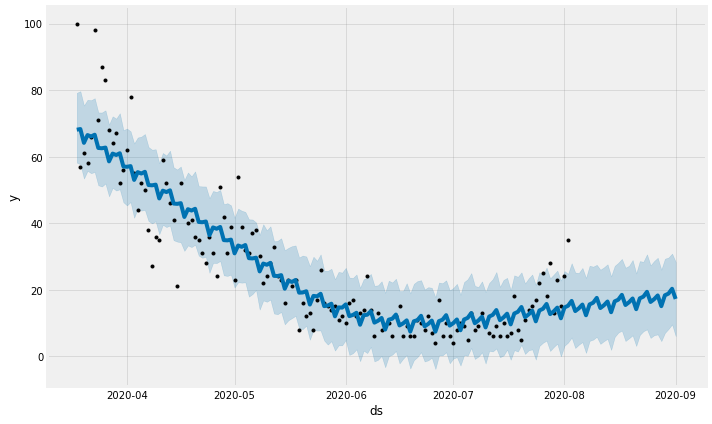

In [72]:
# import numpy as np
forcast_fig = prophet_model.plot(forcast)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



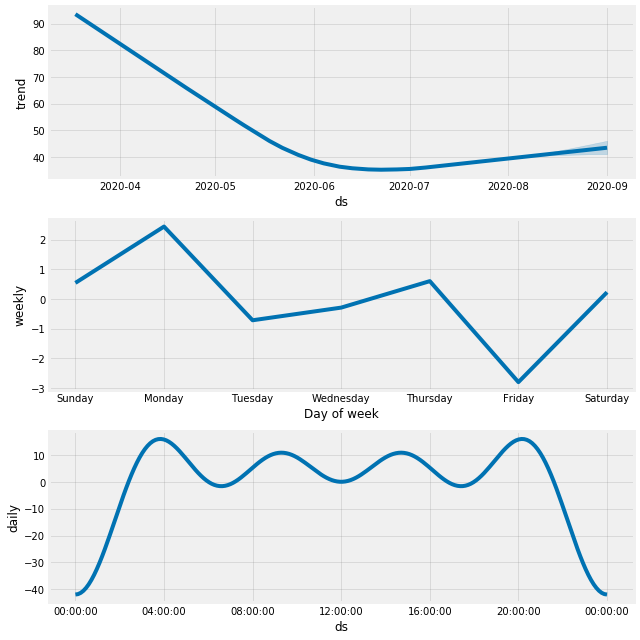

In [73]:
components_plot = prophet_model.plot_components(forcast)

In [74]:
forcast.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
165,2020-08-30,43.131956,8.208221,29.697523,40.995504,45.485540,-24.285846,-24.285846,-24.285846,-25.109165,-25.109165,-25.109165,0.823318,0.823318,0.823318,0.0,0.0,0.0,18.846110
166,2020-08-31,43.262446,9.576557,30.863068,40.992182,45.765185,-22.967633,-22.967633,-22.967633,-25.109165,-25.109165,-25.109165,2.141531,2.141531,2.141531,0.0,0.0,0.0,20.294813
167,2020-09-01,43.392936,6.068347,28.408947,40.981795,46.008594,-26.151654,-26.151654,-26.151654,-25.109165,-25.109165,-25.109165,-1.042490,-1.042490,-1.042490,0.0,0.0,0.0,17.241282


In [75]:
forcast_df = forcast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
forcast_df.tail(30).T

,138,139,140,141,142,143,144,145,146,147,...,158,159,160,161,162,163,164,165,166,167
ds,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00,...,2020-08-23 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00,2020-08-29 00:00:00,2020-08-30 00:00:00,2020-08-31 00:00:00,2020-09-01 00:00:00
yhat_lower,5.64007,2.48963,3.49443,4.2642,1.01198,4.63333,5.01641,5.86156,3.73254,4.55963,...,7.52321,8.09504,5.52551,6.33068,6.57964,4.55387,7.0242,8.20822,9.57656,6.06835
yhat,16.6411,13.5876,14.4235,15.5547,12.3297,15.5949,16.1058,17.5545,14.501,15.337,...,17.9327,19.3814,16.3279,17.1638,18.295,15.07,18.3351,18.8461,20.2948,17.2413
yhat_upper,27.9643,25.166,25.0441,26.5522,23.5415,27.2063,26.9482,27.4969,26.0328,26.7403,...,28.4053,30.651,27.332,28.6512,29.6163,26.0342,29.3289,29.6975,30.8631,28.4089


In [77]:
iplot([go.Scatter(
        x = forcast_df.ds,
        y = forcast_df.yhat,
        name = 'yhat'),
       go.Scatter(
        x = forcast_df.ds,
        y = forcast_df.yhat_lower,
        name = 'yhat_lower', fill = 'tonexty', mode = 'none'),
        go.Scatter(
            x = forcast_df.ds,
        y = forcast_df.yhat_upper,
        name = 'yhat_upper', fill = 'tonexty', mode = 'none')])

In [64]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# import plotly.graph_objs as go
# py.init_notebook_mode()

# fig = plot_plotly(prophet_model, forcast)  # This returns a plotly Figure
# py.iplot(fig)